##### Import the required packages

In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
import pickle
from collections import Counter
from datetime import datetime
from sortedcontainers import SortedList
# We can override the default matplotlib styles with those of Seaborn
sns.set()## Importing the relevant libraries



In [2]:
# Load the data from a .csv
ratings_data = pd.read_csv(os.path.join(os.path.pardir,'data','raw','ratings.csv'))
movies_data = pd.read_csv(os.path.join(os.path.pardir,'data','raw','movies.csv'))

In [3]:
ratings_df = ratings_data.copy()
movies_df = movies_data.copy()

In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
ratings_df.describe(include='all')

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
# Make the user IDs go from 0 to N-1
ratings_df['userId'] = ratings_df['userId'] - 1

In [8]:
# Create a mapper for movie IDs
unique_movie_ids = list(ratings_df['movieId'].unique())
movie_id_mapper = {}
count = 0
for movie_id in unique_movie_ids:
    movie_id_mapper[movie_id] = count
    count +=1

# Add them to the databrame
ratings_df['movieId'] = ratings_df['movieId'].apply(lambda x: movie_id_mapper[x])
ratings_df = ratings_df.drop(columns='timestamp', axis=1)

In [9]:
N = ratings_df['userId'].max() + 1 # Number of users
M = ratings_df['movieId'].max() + 1 # number of movies


# user_id_count = dict(ratings_df['userId'].value_counts())
# movie_id_count = dict(ratings_df['movieId'].value_counts())

user_id_count = Counter(ratings_df['userId'])
movie_id_count = Counter(ratings_df['movieId'])

# Number of users and movies we would like to keep
n = 10000
m = 2000

user_ids = [u for u, c in user_id_count.most_common(n)]
movie_ids = [m for m, c in user_id_count.most_common(m)]

# Make a copy, otherwise the original df won't be overwritten
ratings_df_small = ratings_df[ratings_df['userId'].isin(user_ids) & ratings_df['movieId'].isin(movie_ids)].copy()

# Need to remake user_ids and movie_ids since they are no longer sequential
new_user_id_mapper = {}
i = 0
for old in user_ids:
    new_user_id_mapper[old] = i
    i += 1

new_movie_id_mapper = {}
j = 0
for old in movie_ids:
    new_movie_id_mapper[old] = j
    j += 1
    
    
ratings_df_small['userId'] = ratings_df_small['userId'].apply(lambda x: new_user_id_mapper[x])
ratings_df_small['movieId'] = ratings_df_small['movieId'].apply(lambda x: new_movie_id_mapper[x])

ratings_df_small.to_csv(os.path.join(os.path.pardir,'data','processed','small_ratings.csv'))


In [10]:
ratings_df_processed = ratings_df_small.copy()
N_ = ratings_df_processed['userId'].max() + 1 #Number of users
M_ = ratings_df_processed['movieId'].max() + 1 # Number of movies

# Split the df into train and test
ratings_df_train, ratings_df_test = train_test_split(ratings_df_processed, test_size=0.2)

# A dictionary to tell us, which users have rated which movie
user_movie = {}

# A dictionary to tell us, which movies have been rated by which users
movie_user = {}

# A dictionary to lookup ratings
user_movie_ratings = {}

cutoff = int(0.8 * len(ratings_df_processed))
count = 0
def update_user_movie_and_movie_user(row):
    global count
    count += 1
    if count % 100000 == 0:
        print("Processed: %.3f" % (float(count)/cutoff))
    i = int(row['userId'])
    j = int(row['movieId'])
    if i not in user_movie:
        user_movie[i] = [j]
    else:
        user_movie[i].append(j)
    
    if j not in movie_user:
        movie_user[j] = [i]
    else:
        movie_user[j].append(i)
    user_movie_ratings[(i,j)] = row['rating']

ratings_df_train.apply(update_user_movie_and_movie_user, axis=1)
user_movie

{34: [315,
  627,
  368,
  236,
  572,
  73,
  623,
  621,
  354,
  610,
  420,
  660,
  566,
  208,
  317,
  296,
  68,
  505,
  213,
  328,
  248,
  524,
  588,
  171,
  612,
  292,
  520,
  528,
  422,
  433,
  583,
  629,
  519,
  111,
  597,
  447,
  222,
  66,
  438,
  654,
  33,
  626,
  421,
  384,
  43,
  620,
  378,
  79,
  205,
  635,
  244,
  655,
  665,
  207,
  661,
  364,
  399,
  152,
  397,
  262,
  563,
  458,
  16,
  555,
  161,
  443,
  482,
  177,
  618,
  329,
  525,
  136,
  579,
  467,
  261,
  266,
  639,
  217,
  379,
  184,
  376,
  472,
  561,
  214,
  615,
  611,
  574,
  50,
  544,
  518,
  533,
  195,
  634,
  194,
  4,
  98,
  471,
  163,
  160,
  319,
  571,
  150,
  321,
  6,
  359,
  485,
  13,
  486,
  57,
  374,
  327,
  129,
  245,
  508,
  61,
  124,
  121,
  200,
  662,
  446,
  276,
  15,
  539,
  586,
  601,
  294,
  497,
  193,
  582,
  393,
  143,
  215,
  62,
  249,
  256,
  551,
  430,
  628,
  403,
  336,
  377,
  19,
  429,
  463,
  26,
 

In [11]:
user_movie_ratings_test = {}

def update_user_movie_and_movie_user_test(row):
    global count
    count += 1
    if count % 100000 == 0:
        print("Processed: %.3f" % (float(count)/cutoff))
    i = int(row['userId'])
    j = int(row['movieId'])
    user_movie_ratings_test[(i, j)] = row['rating']


ratings_df_test.apply(update_user_movie_and_movie_user_test, axis=1)

with open(os.path.join(os.path.pardir,'data','interim','user_movie.json'), 'wb') as f:
    pickle.dump(user_movie, f)

with open(os.path.join(os.path.pardir,'data','interim','movie_user.json'), 'wb') as f:
    pickle.dump(movie_user, f)

with open(os.path.join(os.path.pardir,'data','interim','user_movie_rating.json'), 'wb') as f:
    pickle.dump(user_movie_ratings_test, f)
    

In [12]:
# Load the data
with open(os.path.join(os.path.pardir,'data','interim','user_movie.json'), 'rb') as f:
    user_movie = pickle.load(f)

with open(os.path.join(os.path.pardir,'data','interim','movie_user.json'), 'rb') as f:
    movie_user = pickle.load(f)

with open(os.path.join(os.path.pardir,'data','interim','user_movie_rating.json'), 'rb') as f:
    user_movie_ratings_test = pickle.load(f)


#### Matrix factorization

In [13]:
N = np.max(list(user_movie.keys())) + 1
# the test set may contain movies that the train set doesn't have
m1 = np.max(list(movie_user.keys()))
m2 =  np.max([m for (u,m), r in user_movie_ratings_test.items()])
M = max(m1, m2) + 1

print("N: ", N, "M: ", M)

# initialize the variables

K = 10 # Latency dimensionality
W = np.random.randn(N, K)
b = np.zeros(N)
U = np.random.randn(M, K)
c = np.zeros(M)
mu = np.mean(list(user_movie_ratings.values()))

# prediction[i,j] = W[i].dot(U[j]) + b[i] + c.T[j] +mu

def get_loss(d):
    # d: (user_id, movie_id) -> rating
    N = float(len(d))
    sse = 0
    for k, r in d.items():
        i, j = k
        p = W[i].dot(U[j]) + b[i] + c[j] +mu
        sse += (p - r) * (p - r)
    return sse/N
epochs = 25
reg = 20. # regularization penalty
train_losses = []
test_losses = []

for epoch in range(epochs):
    print("Epoch: ", epoch)
    epoch_start = datetime.now()
    # perform updates
    
    # update w and b
    t0 = datetime.now()
    for i in range(N):
        # for W 
        matrix = np.eye(K) * reg
        vector = np.zeros(K)
        
        # for b
        bi = 0
        for j in user_movie[i]:
            r = user_movie_ratings[(i, j)]
            matrix += np.outer(U[j], U[j])
            vector += (r - b[i] - c[j] - mu) * U[j]
            bi += (r - W[i].dot(U[j]) - c[j] -mu)
            
        # set the updates
        W[i] = np.linalg.solve(matrix, vector)
        b[i] = bi / (len(user_movie[i]) + reg)
        
        if i%(N//10) == 0:
            print("i: ", i, "N: ", N)
    
    # update U and c
    t0 = datetime.now()
    for j in range(M):
        # for U
        matrix = np.eye(K) * reg
        vector = np.zeros(K)
        
        # for c
        cj = 0
        try:
            for i in user_movie[j]:
                r = user_movie_ratings[(i, j)]
                matrix += np.outer(W[i], W[i])
                vector += (r - b[i] - c[j] - mu) * W[i]
                cj += (r - W[i].dot(U[j]) - b[i] -mu)

            # set the updates
            U[j] = np.linalg.solve(matrix, vector)
            c[j] = cj / (len(user_movie[j]) + reg)

            if j%(M//10) == 0:
                print("j: ", j, "M: ", M)
        except KeyError:
            # it's possible not to have any ratings for a movie
            pass
    print("Updated U and c: ", datetime.now() - t0)
    print("Updated W and b: ", datetime.now() - epoch_start)
    
    
    # store train losses
    t0 = datetime.now()
    train_losses.append(get_loss(user_movie_ratings))
    
    # store test losses
    test_losses.append(get_loss(user_movie_ratings_test))
    print("Calculate cost: ", datetime.now() - t0)
    print("Train loss: ", train_losses[-1])
    print("Test loss: ", test_losses[-1])
    

print("Train losses: ", train_losses)
print("Test losses: ", test_losses)   
    
# plot losses
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

#### Matrix factorization 2

N:  671 M:  671
converting..
conversion done
Epoch:  0
i:  0 N:  671
i:  67 N:  671
i:  134 N:  671
i:  201 N:  671
i:  268 N:  671
i:  335 N:  671
i:  402 N:  671
i:  469 N:  671
i:  536 N:  671
i:  603 N:  671
i:  670 N:  671
j:  0 M:  671
j:  67 M:  671
j:  134 M:  671
j:  201 M:  671
j:  268 M:  671
j:  335 M:  671
j:  402 M:  671
j:  469 M:  671
j:  536 M:  671
j:  603 M:  671
j:  670 M:  671
Updated U and c:  0:00:00.065562
Updated W and b:  0:00:00.188610
Calculate cost:  0:00:00.033341
Train loss:  0.9029921989794298
Test loss:  1.5553685796332695
Epoch:  1
i:  0 N:  671
i:  67 N:  671
i:  134 N:  671
i:  201 N:  671
i:  268 N:  671
i:  335 N:  671
i:  402 N:  671
i:  469 N:  671
i:  536 N:  671
i:  603 N:  671
i:  670 N:  671
j:  0 M:  671
j:  67 M:  671
j:  134 M:  671
j:  201 M:  671
j:  268 M:  671
j:  335 M:  671
j:  402 M:  671
j:  469 M:  671
j:  536 M:  671
j:  603 M:  671
j:  670 M:  671
Updated U and c:  0:00:00.065465
Updated W and b:  0:00:00.152327
Calculate cost: 

Calculate cost:  0:00:00.031517
Train loss:  0.6842039466356631
Test loss:  1.2912998470990458
Epoch:  17
i:  0 N:  671
i:  67 N:  671
i:  134 N:  671
i:  201 N:  671
i:  268 N:  671
i:  335 N:  671
i:  402 N:  671
i:  469 N:  671
i:  536 N:  671
i:  603 N:  671
i:  670 N:  671
j:  0 M:  671
j:  67 M:  671
j:  134 M:  671
j:  201 M:  671
j:  268 M:  671
j:  335 M:  671
j:  402 M:  671
j:  469 M:  671
j:  536 M:  671
j:  603 M:  671
j:  670 M:  671
Updated U and c:  0:00:00.086245
Updated W and b:  0:00:00.178828
Calculate cost:  0:00:00.029537
Train loss:  0.6837163333700035
Test loss:  1.3056377265706858
Epoch:  18
i:  0 N:  671
i:  67 N:  671
i:  134 N:  671
i:  201 N:  671
i:  268 N:  671
i:  335 N:  671
i:  402 N:  671
i:  469 N:  671
i:  536 N:  671
i:  603 N:  671
i:  670 N:  671
j:  0 M:  671
j:  67 M:  671
j:  134 M:  671
j:  201 M:  671
j:  268 M:  671
j:  335 M:  671
j:  402 M:  671
j:  469 M:  671
j:  536 M:  671
j:  603 M:  671
j:  670 M:  671
Updated U and c:  0:00:00.0809

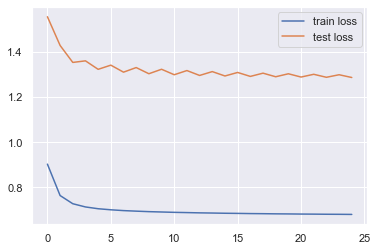

In [21]:
N = np.max(list(user_movie.keys())) + 1
# the test set may contain movies that the train set doesn't have
m1 = np.max(list(movie_user.keys()))
m2 =  np.max([m for (u,m), r in user_movie_ratings_test.items()])
M = max(m1, m2) + 1

print("N: ", N, "M: ", M)


# convert user_movie and movie_user to include ratings

print("converting..")

user2movie_rating = {}

for i, movies in user_movie.items():
    r = np.array([user_movie_ratings[(i, j)] for j in movies])
    user2movie_rating[i] = (movies, r)

movie2user_rating = {}

for j, users in movie_user.items():
    r = np.array([user_movie_ratings[(i, j)] for i in users])
    movie2user_rating[j] = (users, r)


# create a movie_user for test set, since we need it for loss

movie2user_rating_test = {}

for (i, j), r in user_movie_ratings_test.items():
    if j not in movie2user_rating_test:
        movie2user_rating_test[j] = [[i], [r]]
    else:
        movie2user_rating_test[j][0].append(i)
        movie2user_rating_test[j][1].append(r)
for j,(users, r) in movie2user_rating_test.items():
    movie2user_rating_test[j][1] =  np.array(r)
print("conversion done")

# initialize the variables

K = 10 # Latency dimensionality
W = np.random.randn(N, K)
b = np.zeros(N)
U = np.random.randn(M, K)
c = np.zeros(M)
mu = np.mean(list(user_movie_ratings.values()))

# prediction[i,j] = W[i].dot(U[j]) + b[i] + c.T[j] +mu

def get_loss(m2u): 
    # d: movie_id -> (user_ids, ratings)
    N = 0
    sse = 0
    for j, (u_ids, r) in m2u.items():
        p = W[u_ids].dot(U[j]) + b[u_ids] + c[j] + mu
        delta = p - r
        sse += delta.dot(delta)
        N += len(r)
    return sse / N

epochs = 25
reg = .1 # regularization penalty
train_losses = []
test_losses = []

for epoch in range(epochs):
    print("Epoch: ", epoch)
    epoch_start = datetime.now()
    # perform updates
    
    # update w and b
    t0 = datetime.now()
    for i in range(N):
        m_ids, r = user2movie_rating[i]
        matrix = U[m_ids].T.dot(U[m_ids]) + np.eye(K) * reg
        vector = (r - b[i] - c[m_ids] - mu).dot(U[m_ids])
        bi = (r - U[m_ids].dot(W[i]) - c[m_ids] - mu).sum()
        

        # set the updates
        W[i] = np.linalg.solve(matrix, vector)
        b[i] = bi / (len(user_movie[i]) + reg)
        
        if i%(N//10) == 0:
            print("i: ", i, "N: ", N)
    
    # update U and c
    t0 = datetime.now()
    for j in range(M):
        try:
            u_ids, r = movie2user_rating[j]
            matrix = W[u_ids].T.dot(W[u_ids]) + np.eye(K) * reg
            vector = (r - b[u_ids] - c[j] - mu).dot(W[u_ids])
            cj = (r - W[u_ids].dot(U[j]) - b[u_ids] -mu).sum()


            # set the updates
            U[i] = np.linalg.solve(matrix, vector)
            c[i] = cj / (len(movie_user[j]) + reg)

            if j%(M//10) == 0:
                print("j: ", j, "M: ", M)
        except KeyError:
            # it's possible not to have any ratings for a movie
            pass
    print("Updated U and c: ", datetime.now() - t0)
    print("Updated W and b: ", datetime.now() - epoch_start)
    
    
    # store train losses
    t0 = datetime.now()
    train_losses.append(get_loss(movie2user_rating))
    
    # store test losses
    test_losses.append(get_loss(movie2user_rating_test))
    print("Calculate cost: ", datetime.now() - t0)
    print("Train loss: ", train_losses[-1])
    print("Test loss: ", test_losses[-1])
    

print("Train losses: ", train_losses)
print("Test losses: ", test_losses)   
    
# plot losses
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()